In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
## import libraries
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
## Load and Explore the data
app_data = pd.read_csv("application_record.csv")
credit_data = pd.read_csv("credit_record.csv")

In [ ]:
app_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [ ]:
credit_data

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [ ]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
credit_data.shape

(1048575, 3)

In [ ]:
app_data.shape

(438557, 18)

In [ ]:
app_data.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [ ]:
credit_data.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


In [ ]:
### Picking a random Id from credit_data and filter the entries
selected_id = 5069280

credit_data[credit_data['ID'] == selected_id]

,ID,MONTHS_BALANCE,STATUS
595322,5069280,0,X
595323,5069280,-1,0
595324,5069280,-2,0
595325,5069280,-3,0
595326,5069280,-4,0
595327,5069280,-5,X
595328,5069280,-6,0
595329,5069280,-7,X
595330,5069280,-8,0
595331,5069280,-9,X


In [ ]:
# Merge both the app_data and credit_data using 'ID' column as the key
# We'll apply the inner join such that every row in the merged df has application record whose ID matches with credit record is created
data = pd.merge(app_data, credit_data, on='ID', how='inner')

In [ ]:
print(f'Duplicate records in merged record : {data.duplicated().sum()}')

Duplicate records in merged record : 0


In [ ]:
### Check for duplicates
print(f'Duplicate records in application record : {app_data.duplicated().sum()}')
print(f'Duplicate records in credit record : {credit_data.duplicated().sum()}')

Duplicate records in application record : 0
Duplicate records in credit record : 0


In [ ]:
# Function which show the null values in each column in percentage
def CountNullData(df):
    return ( round(df.isna().sum()/df.shape[0] * 100, 2) )

In [ ]:
### Check for null values
print(f'Null records in merged record : {CountNullData(data)}')

Null records in merged record : ID                      0.00
CODE_GENDER             0.00
FLAG_OWN_CAR            0.00
FLAG_OWN_REALTY         0.00
CNT_CHILDREN            0.00
AMT_INCOME_TOTAL        0.00
NAME_INCOME_TYPE        0.00
NAME_EDUCATION_TYPE     0.00
NAME_FAMILY_STATUS      0.00
NAME_HOUSING_TYPE       0.00
DAYS_BIRTH              0.00
DAYS_EMPLOYED           0.00
FLAG_MOBIL              0.00
FLAG_WORK_PHONE         0.00
FLAG_PHONE              0.00
FLAG_EMAIL              0.00
OCCUPATION_TYPE        30.87
CNT_FAM_MEMBERS         0.00
MONTHS_BALANCE          0.00
STATUS                  0.00
dtype: float64


In [ ]:
#data.drop(['OCCUPATION_TYPE', 'DAYS_BIRTH', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL'], axis=1, inplace=True)
data.drop(['OCCUPATION_TYPE'], axis=1, inplace=True)

In [ ]:
data.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'STATUS'],
      dtype='object')

In [ ]:
data.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
count,7.777150e+05,777715.000000,7.777150e+05,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000
mean,5.078743e+06,0.428082,1.885348e+05,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,2.208837,-19.373564
std,4.180442e+04,0.745755,1.016225e+05,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,0.907380,14.082208
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,5.044568e+06,0.000000,1.215000e+05,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,2.000000,-29.000000
50%,5.069530e+06,0.000000,1.620000e+05,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,2.000000,-17.000000
75%,5.115551e+06,1.000000,2.250000e+05,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,3.000000,-8.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


In [ ]:
# Let's rename the values of the 'Status' field
data['STATUS'].value_counts()

C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: STATUS, dtype: int64

In [ ]:
# We renamed the value based on 0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

data['STATUS'] = data['STATUS'].map({'0': 'first_month_due' , '1': '2nd_month_due', '2' : '3rd_month_overdue',  '3': '4th_month_overdue',
                                '4' : '5th_month_overdue', '5' : 'bad_debt' , 'C': 'pay_off' , 'X' : 'no_loan'})

In [ ]:
data['STATUS'].value_counts()

pay_off              329536
first_month_due      290654
no_loan              145950
2nd_month_due          8747
bad_debt               1527
3rd_month_overdue       801
4th_month_overdue       286
5th_month_overdue       214
Name: STATUS, dtype: int64

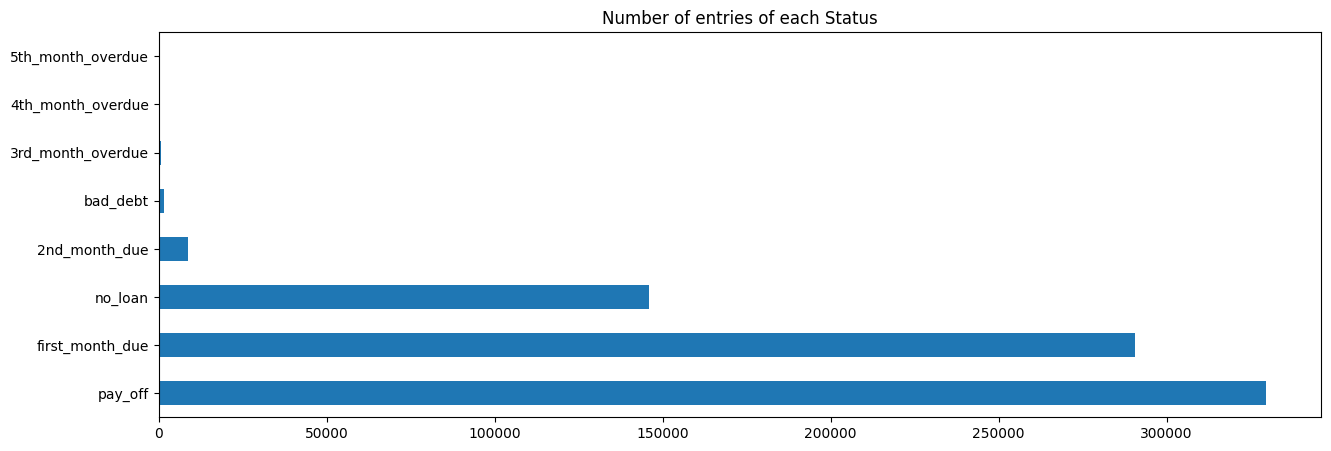

In [ ]:
# checking the distribution of loan_status
data['STATUS'].value_counts().plot(kind='barh', figsize=(15, 5))
# defining the title
plt.title('Number of entries of each Status')
plt.show()

In [ ]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0,pay_off
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-1,pay_off
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-2,pay_off
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-3,pay_off
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-4,pay_off


In [ ]:
#  Label Encoding for categorical variables
data.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'STATUS'],
      dtype='object')

In [ ]:
col_names = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'STATUS']


le = LabelEncoder()

# for loop to encode the categorical columns
for i in col_names:
    data[i] =le.fit_transform(data[i] )

In [ ]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,0,7
1,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,-1,7
2,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,-2,7
3,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,-3,7
4,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,-4,7


In [ ]:
data['STATUS'].value_counts()

7    329536
5    290654
6    145950
0      8747
4      1527
1       801
2       286
3       214
Name: STATUS, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  int64  
 2   FLAG_OWN_CAR         777715 non-null  int64  
 3   FLAG_OWN_REALTY      777715 non-null  int64  
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  int64  
 7   NAME_EDUCATION_TYPE  777715 non-null  int64  
 8   NAME_FAMILY_STATUS   777715 non-null  int64  
 9   NAME_HOUSING_TYPE    777715 non-null  int64  
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

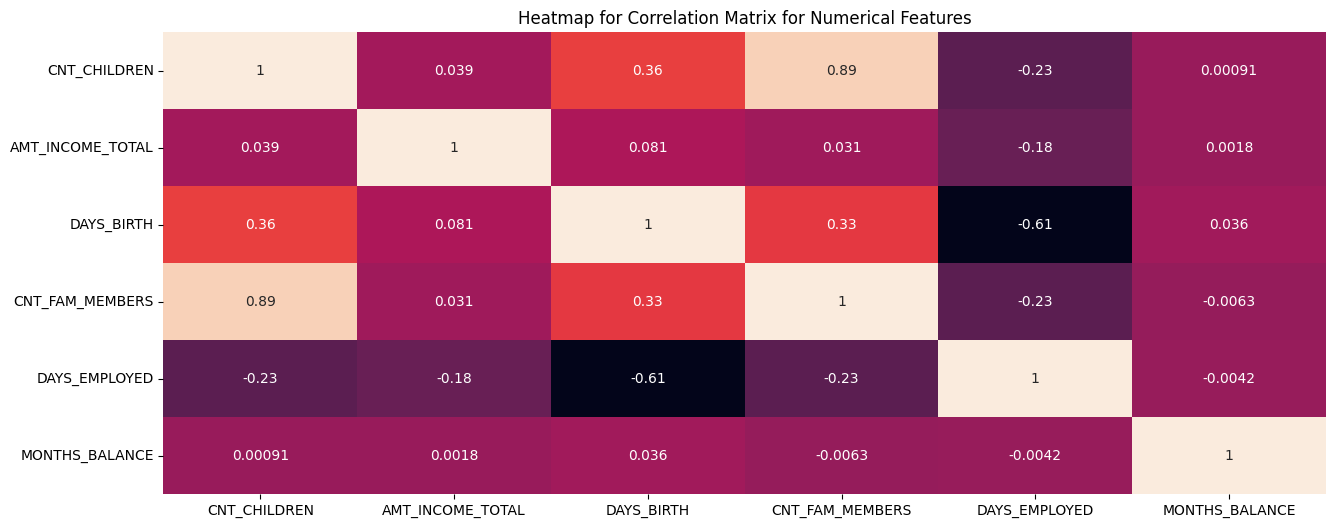

In [ ]:
# Assumption : Random forest assumes that all variable are independent
# Check for independence condition (We need to drop all the columns which are correlated)
## correlation matrix

# defining the figure size
plt.figure(figsize=(15, 6))
# plotting the heatmap
sns.heatmap(data[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH',  'CNT_FAM_MEMBERS', 'DAYS_EMPLOYED', 'MONTHS_BALANCE']].corr(), annot=True , cbar=False)

plt.xticks()
plt.title('Heatmap for Correlation Matrix for Numerical Features')
plt.show()

In [ ]:
# Check for Multicollinearity
# Drop 'status' columns from col
col = data.drop(['STATUS'], axis=1) # Assume that col is our independent variable

# Compute variance inflation factor (VIF)

# Create a dataframe to store the VIF
vif_factor  = pd.DataFrame(columns=["VIF", "Features"] )
# For each column, compute the VIF
vif_factor["Features"] = col.columns
vif_factor["VIF"] = [variance_inflation_factor(col.values, i) for i in range(col.shape[1])]

# Display the results
vif_factor

,VIF,Features
0,1.018433,ID
1,1.236971,CODE_GENDER
2,1.222903,FLAG_OWN_CAR
3,1.097755,FLAG_OWN_REALTY
4,17.794955,CNT_CHILDREN
5,1.188163,AMT_INCOME_TOTAL
6,1.194357,NAME_INCOME_TYPE
7,1.109060,NAME_EDUCATION_TYPE
8,4.972200,NAME_FAMILY_STATUS
9,1.072800,NAME_HOUSING_TYPE


In [ ]:
# Store the features and labels
X = data.drop(['CNT_FAM_MEMBERS', 'CNT_CHILDREN' , 'FLAG_MOBIL', 'STATUS'], axis = 1)
y = data['STATUS']

In [ ]:
X.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,MONTHS_BALANCE
0,5008804,1,1,1,427500.0,4,1,0,4,-12005,-4542,1,0,0,0
1,5008804,1,1,1,427500.0,4,1,0,4,-12005,-4542,1,0,0,-1
2,5008804,1,1,1,427500.0,4,1,0,4,-12005,-4542,1,0,0,-2
3,5008804,1,1,1,427500.0,4,1,0,4,-12005,-4542,1,0,0,-3
4,5008804,1,1,1,427500.0,4,1,0,4,-12005,-4542,1,0,0,-4


In [ ]:
y.head()

0    7
1    7
2    7
3    7
4    7
Name: STATUS, dtype: int64

In [ ]:
# Split the data into training and testing (85% and 15%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, shuffle=True)

In [ ]:
X_train.shape, y_train.shape

((661057, 15), (661057,))

In [ ]:
X_test.shape, y_test.shape

((116658, 15), (116658,))

In [ ]:
# Model building

from sklearn.metrics import accuracy_score , classification_report, f1_score, precision_score, recall_score

# initialize the model
model = RandomForestClassifier()

# fit the model
model.fit(X_train, y_train )

# let's predict
y_pred = model.predict(X_test)

In [ ]:
y_test.head()

471608    5
662486    5
527587    5
130463    7
146150    6
Name: STATUS, dtype: int64

In [ ]:
pd.DataFrame(y_pred).head()

,0
0,5
1,5
2,5
3,7
4,5


In [ ]:
y_test.value_counts()

7    49578
5    43549
6    21820
0     1327
4      190
1      115
2       46
3       33
Name: STATUS, dtype: int64

In [ ]:
pd.DataFrame(y_pred).value_counts()

7    49419
5    45226
6    20640
0     1044
4      187
1       81
2       39
3       22
dtype: int64

In [ ]:
# Let's calculate the accuracy
(f'Accuracy Score : {accuracy_score(y_test, y_pred)*100:.3f} %')

'Accuracy Score : 88.440 %'

In [ ]:
# Print the classification reports
print(f"{model} Classification Report:")
print(classification_report(y_test, y_pred))

RandomForestClassifier() Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.26      0.29      1327
           1       0.20      0.14      0.16       115
           2       0.08      0.07      0.07        46
           3       0.05      0.03      0.04        33
           4       0.88      0.86      0.87       190
           5       0.85      0.88      0.86     43549
           6       0.83      0.79      0.81     21820
           7       0.95      0.95      0.95     49578

    accuracy                           0.88    116658
   macro avg       0.52      0.50      0.51    116658
weighted avg       0.88      0.88      0.88    116658

